# Logistic Regression

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [36]:
ins=pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/7_logistic_reg/insurance_data.csv')
ins

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


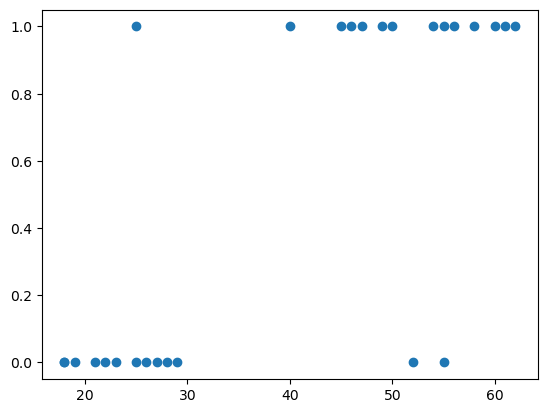

In [5]:
plt.scatter(ins.age,ins.bought_insurance)

In [26]:
X=ins[['age']] # double brackets notes its a 2D array
X

,age
0,22
1,25
2,47
3,52
4,46
5,56
6,55
7,60
8,62
9,61


In [27]:
Y=ins[['bought_insurance']]
Y

,bought_insurance
0,0
1,0
2,1
3,0
4,1
5,1
6,0
7,1
8,1
9,1


In [28]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3,random_state=3)

In [29]:
X_train

,age
23,45
14,49
4,46
22,40
6,55
7,60
5,56
20,21
9,61
11,28


In [30]:
X_test

,age
18,19
17,58
12,27
25,54
15,55
16,25
13,29
2,47
1,25


In [31]:
reg=LogisticRegression()
reg

LogisticRegression()

In [32]:
reg.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [36]:
reg.predict(X_test)

array([0, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

# MULTICLASS LOGISTIC REGRESSION

In [64]:
from sklearn.datasets import load_digits # the data set contains blurred images

In [65]:
digits=load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [43]:
dir(digits) # these are column names here we can select our X and Y and train them

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [44]:
digits.data[1:10]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  3., 13., 16.,
        16., 11.,  5.,  0.,  0.,  0.,  0.,  3., 11., 16.,  9.,  0.],
       [ 0.,  0.,  7., 15., 13.,  1.,  0.,  0.,  0.,  8., 13.,  6., 15.,
         4.,  0.,  0.,  0.,  2.,  1., 13., 13.,  0.,  0.,  0.,  0.,  0.,
         2., 15., 11.,  1.,  0.,  0.,  0.,  0.,  0.,  1., 12., 12.,  1.,
         0.,  0.,  0.,  0.,  0.,  1., 10.,  8.,  0.,  0.,  

In [45]:
X=digits['data']
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [46]:
Y=digits['target']
Y

array([0, 1, 2, ..., 8, 9, 8])

In [47]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)


In [48]:
reg=LogisticRegression()
reg

LogisticRegression()

In [49]:
reg.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
reg.predict(X_test) # this is the predicted output Y_PREDICT
# for accuracy we compare Y_predict with truth data that is Y_test

array([7, 2, 7, 2, 5, 8, 6, 5, 3, 5, 3, 6, 1, 5, 6, 1, 4, 9, 2, 4, 0, 7,
       1, 1, 9, 0, 9, 1, 2, 1, 0, 6, 9, 9, 5, 6, 6, 0, 0, 4, 1, 8, 8, 9,
       8, 1, 3, 4, 5, 4, 3, 1, 5, 7, 2, 9, 6, 0, 9, 3, 1, 7, 9, 1, 2, 3,
       1, 6, 3, 5, 9, 9, 2, 5, 7, 9, 0, 8, 9, 7, 4, 5, 1, 9, 0, 0, 3, 0,
       0, 3, 5, 8, 8, 4, 9, 2, 1, 3, 6, 8, 7, 5, 5, 8, 4, 8, 1, 2, 4, 3,
       0, 5, 3, 2, 4, 5, 9, 2, 3, 2, 4, 9, 9, 5, 4, 3, 4, 5, 8, 1, 8, 8,
       0, 7, 0, 2, 2, 6, 9, 2, 1, 1, 7, 8, 1, 9, 8, 4, 6, 8, 9, 5, 7, 1,
       1, 3, 8, 0, 6, 9, 0, 7, 4, 6, 6, 4, 7, 0, 7, 5, 0, 3, 7, 5, 5, 1,
       2, 9, 2, 1, 7, 4, 7, 4, 0, 8, 7, 1, 8, 7, 0, 7, 3, 4, 1, 8, 4, 3,
       7, 8, 3, 5, 7, 7, 4, 0, 9, 6, 2, 8, 0, 8, 5, 5, 5, 2, 2, 9, 1, 5,
       3, 2, 7, 5, 9, 1, 4, 9, 4, 6, 1, 6, 9, 6, 6, 1, 9, 8, 0, 4, 0, 2,
       6, 9, 8, 8, 1, 6, 3, 9, 1, 6, 3, 0, 3, 7, 4, 3, 0, 1, 4, 8, 3, 5,
       3, 8, 8, 3, 0, 8, 5, 2, 2, 6, 9, 4, 4, 1, 0, 4, 6, 2, 5, 7, 8, 9,
       7, 5, 0, 3, 1, 1, 6, 5, 3, 8, 9, 9, 2, 1, 6,

In [51]:
reg.score(X_test,Y_test)

0.9611111111111111

In [52]:
digits.target[69]

9

In [53]:
reg.predict([digits.data[69]])

array([9])

# plotting a confusion matrix

In [59]:
Y_predict = reg.predict(X_test)
Y_predict
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(Y_test,Y_predict)
cm
# we are comparing Y_test (truth data) with Y_predict (predicted output) to calculate accuracy of the model
# confusionmatrix clearly explains instances where it went wrong
# above we got accuracy of 96.6%, cm helps us to see the wrong 4%

array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0, 31,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  1,  0,  0,  3],
       [ 0,  0,  0,  0,  0,  0, 31,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 33,  0,  0],
       [ 0,  0,  1,  1,  1,  1,  0,  0, 35,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 35]], dtype=int64)

# visuals

<AxesSubplot:>

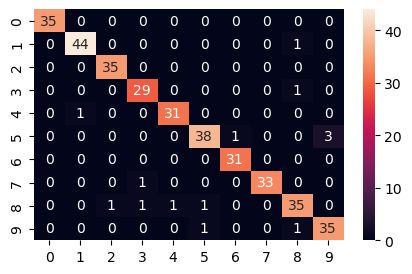

In [63]:
import seaborn as sn
plt.figure(figsize =(5,3))
sn.heatmap(cm,annot=True)